# Data Cleaning for IndabaX Challenge

## Data Story

When providing insurance, there are very few points of contact between customers and the insurance provider. Because of this, AutoInland (an Insurance company in west Africa with a focus on Auto Insurance) needs to make every point of contact count; one of the most valuable of these is filing and settlement of claims.

The data describes ~12,000 policies sold by AutoInland for car insurance. Information on the car type, make, customer age and start of policy are in the data.

Here, I show strategies on how to clean the data.

The dataset is available here:

https://zindi.africa/hackathons/indabax-ghana-autoinland-vehicle-insurance-claim/data


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import datetime as dt
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore') 

In [6]:
# Load files into a pandas dataframe
train = pd.read_csv('Train_Indaba.csv')
test = pd.read_csv('Test_Indaba.csv')
sub = pd.read_csv('SampleSubmission.csv')
train.head()


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [7]:
train.shape,test.shape

((12079, 14), (1202, 13))

In [8]:
#Get the definitions of the variables
variable_definitions=pd.read_csv('VariableDefinitions.csv')
variable_definitions

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [19]:
#concat train and test for easy preprocessing
train['trash']=1
test['trash']=0
all_data=pd.concat((train,test))
print(all_data.shape)

(13281, 15)


## Exploratory Data Analysis

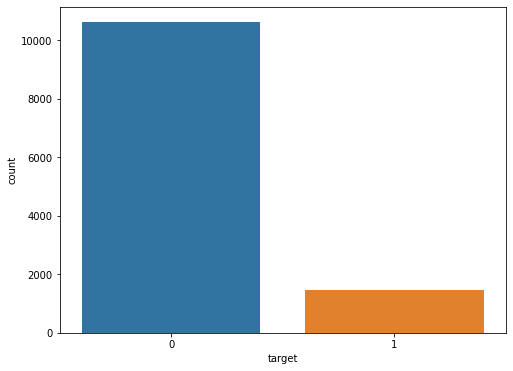

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(train["target"])
plt.show()

The data is highly imbalanced

In [20]:
all_data.isnull().sum() #check for null values

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     400
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              4110
Subject_Car_Colour        7659
Subject_Car_Make          2724
LGA_Name                  7132
State                     7144
ProductName                  0
target                    1202
trash                        0
dtype: int64

The data contains a lot of null values. We explore each column one after another.

In [21]:
all_data.Age.value_counts()

 40      900
 50      686
 41      550
 36      537
 38      514
        ... 
 140       1
-27        1
-51        1
 133       1
-6099      1
Name: Age, Length: 110, dtype: int64

Age contains negative values which ought not to be. So, we replace negative values with 0

In [26]:
def neg(x):
    if x<0:
        return 0
    else:
        return x
all_data['Age']=all_data['Age'].apply(neg)
for values in all_data["Age"]:
    if values <0:
        print(values)
    else:
        print(vale)

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no negative values
There are no n

There are no more negative values

In [27]:
all_data["Gender"].value_counts().to_frame()

,Gender
Male,8356
Female,3679
Entity,300
Joint Gender,238
NOT STATED,190
NO GENDER,76
SEX,42


We see here again some values that ought not to be there. So, we replace Entity, Not Stated, No Gender and Sex with null values and fill with the mode later.

In [28]:
all_data['Gender']=all_data['Gender'].replace({"Entity":np.nan,         
                                                "NOT STATED":np.nan,
                                                "NO GENDER":np.nan,
                                                "SEX":np.nan})

In [29]:
all_data["ProductName"].value_counts().to_frame()

,ProductName
Car Classic,7142
CarSafe,4154
Customized Motor,605
Car Plus,523
CVTP,509
CarFlex,194
Muuve,100
Motor Cycle,49
Car Vintage,5


In [31]:
all_data["ProductName"].isna().sum()

0

ProductName seems okay. There are no funny names and no missing values.

In [32]:
all_data["Car_Category"].value_counts().to_frame()

,Car_Category
Saloon,6633
JEEP,2223
Truck,108
Bus,56
Mini Bus,45
Pick Up,32
Motorcycle,18
Sedan,14
Mini Van,13
Wagon,10


We want to reduce the number of unique values and also some names are funny like shape of vehicle chasis so we replace

In [33]:
all_data['Car_Category']=all_data['Car_Category'].str.lower()
all_data['Car_Category']=all_data['Car_Category'].replace({'tipper truck':'truck',
                                                           'mini van':"van",
                                                           "mini bus":"bus",
                                                           "camry car hire":"sedan",
                                                           "pick up > 3 tons":"pick up",
                                                           "shape of vehicle chasis":"wagon",
                                                           "station 4 wheel":"wagon"
                                                              
})

In [41]:
all_data['Subject_Car_Make']=all_data['Subject_Car_Make'].str.lower()
all_data['LGA_Name']=all_data['LGA_Name'].str.lower()
all_data['State']=all_data['State'].str.lower()
all_data['Subject_Car_Make']=all_data['Subject_Car_Make'].replace({'.':np.nan})

In [42]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,trash
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,saloon,Black,toyota,victoria island,lagos,Car Classic,0.0,1
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,jeep,Grey,toyota,victoria island,lagos,Car Classic,1.0,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,saloon,Red,toyota,victoria island,lagos,Car Classic,0.0,1
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,saloon,Black,toyota,victoria island,lagos,CarSafe,0.0,1
4,ID_00BRP63,2010-08-29,2010-12-31,Male,20,2010-08-29,3,saloon,Black,toyota,lagos,lagos,Muuve,1.0,1


In [43]:
all_data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category                 0
Subject_Car_Colour           0
Subject_Car_Make             0
LGA_Name                     0
State                        0
ProductName                  0
target                    1202
trash                        0
dtype: int64

In [44]:
cat_cols=['Gender','Car_Category','Subject_Car_Colour','Subject_Car_Make','State',
          'ProductName','LGA_Name']
for col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [45]:
all_data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category                 0
Subject_Car_Colour           0
Subject_Car_Make             0
LGA_Name                     0
State                        0
ProductName                  0
target                    1202
trash                        0
dtype: int64

In [46]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,trash
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,saloon,Black,toyota,victoria island,lagos,Car Classic,0.0,1
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,jeep,Grey,toyota,victoria island,lagos,Car Classic,1.0,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,saloon,Red,toyota,victoria island,lagos,Car Classic,0.0,1
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,saloon,Black,toyota,victoria island,lagos,CarSafe,0.0,1
4,ID_00BRP63,2010-08-29,2010-12-31,Male,20,2010-08-29,3,saloon,Black,toyota,lagos,lagos,Muuve,1.0,1
